In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
train_fmnist = torchvision.datasets.FashionMNIST(root=".",train = True, transform= transforms.ToTensor(),download = True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8404936.34it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 139039.76it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2565588.89it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15669286.64it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [3]:
test_fmnist = torchvision.datasets.FashionMNIST(root = ".",train = False,transform = transforms.ToTensor())

In [6]:
test_fmnist.data.shape

torch.Size([10000, 28, 28])

In [8]:
#data loader

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_fmnist,batch_size = batch_size,shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_fmnist,batch_size=batch_size,shuffle = False)

In [9]:
#model building (OOPs)

class ANN(nn.Module):
  def __init__(self):
    super(ANN,self).__init__()

    self.layer1 = nn.Linear(784,512)
    self.layer2 = nn.ReLU()
    self.layer3 = nn.Linear(512,10)

  def forward(self,x):

    out = self.layer3(self.layer2(self.layer1(x)))
    return out

  



In [10]:
model = ANN()

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


ANN(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): ReLU()
  (layer3): Linear(in_features=512, out_features=10, bias=True)
)

In [12]:
criterion  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [15]:
#training



epochs = 15
train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)
for i in range(epochs):

  model.train()
  train_losses = []
  for inputs, targets in train_loader:

    inputs,targets = inputs.to(device),targets.to(device)

    inputs = inputs.view(inputs.size(0),-1)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss_train = criterion(outputs,targets)

    loss_train.backward()

    optimizer.step()

    train_losses.append(loss_train.item())

  train_losses = np.mean(train_losses) 


  model.eval()
  test_losses = []
  for inputs,targets in test_loader:

    inputs,targets = inputs.to(device),targets.to(device)

    inputs = inputs.view(inputs.size(0),-1)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss_test = criterion(outputs,targets)

    test_losses.append(loss_test.item())

  test_losses = np.mean(test_losses)

  train_loss[i] = train_losses
  test_loss[i] = test_losses

  print(f"epoch-- 1/{i+1} -- training loss - {train_losses} --  test loss - {test_losses}   ")


    



epoch-- 1/1 -- training loss - 0.5340064872048302 --  test loss - 0.5023882717271394   
epoch-- 1/2 -- training loss - 0.38504921281134397 --  test loss - 0.4075760571639749   
epoch-- 1/3 -- training loss - 0.3411439525674401 --  test loss - 0.37253524947770034   
epoch-- 1/4 -- training loss - 0.31462481994428104 --  test loss - 0.34954932784732384   
epoch-- 1/5 -- training loss - 0.2947533894449409 --  test loss - 0.3401816955095605   
epoch-- 1/6 -- training loss - 0.28288587543374694 --  test loss - 0.33632027027727684   
epoch-- 1/7 -- training loss - 0.26670830077263336 --  test loss - 0.3640912816494326   
epoch-- 1/8 -- training loss - 0.25595903158314953 --  test loss - 0.3332216060614284   
epoch-- 1/9 -- training loss - 0.2457072092081184 --  test loss - 0.32154927845997144   
epoch-- 1/10 -- training loss - 0.23165389800122552 --  test loss - 0.3358641004637827   
epoch-- 1/11 -- training loss - 0.22675065540555697 --  test loss - 0.31611507716058174   
epoch-- 1/12 -- tr

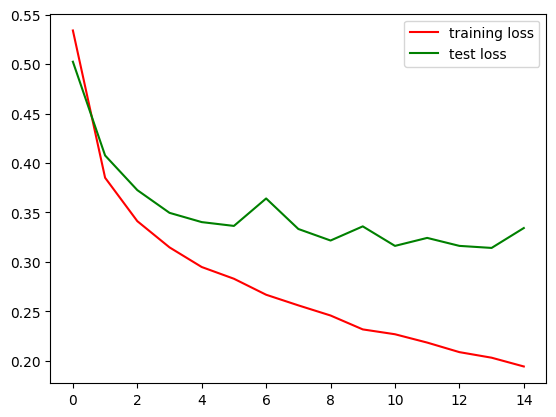

In [17]:
#accuracy

plt.plot(train_loss,label = "training loss", c = "r")
plt.plot(test_loss, label = "test loss", c = "g")
plt.legend()
plt.show()

In [18]:
#accuracy

model.eval()

n_correct = 0
n_total = 0 

for inputs,targets in train_loader:

  inputs,targets = inputs.to(device),targets.to(device)

  inputs = inputs.view(inputs.size(0),-1)

  outputs = model(inputs)

  _ , preds = torch.max(outputs,1)

  n_correct += (preds==targets).cpu().numpy().sum()

  n_total += len(targets)


train_acc = n_correct/n_total




n_correct = 0 
n_total = 0
for inputs,targets in test_loader:

  inputs,targets = inputs.to(device),targets.to(device)
  inputs = inputs.view(inputs.size(0),-1)

  outputs = model(inputs)

  _, preds = torch.max(outputs,1)

  n_correct += (preds==targets).cpu().numpy().sum()

  n_total += len(targets)

test_acc = n_correct/n_total


print(f"training accuracy -- {train_acc} , test accuracy -- {test_acc}")



training accuracy -- 0.92615 , test accuracy -- 0.8819
